# IMPORTIG PACKAGES

In [4]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# IMPORTING THE DATASET

In [5]:
df=pd.read_csv("basket_analysis.csv")

In [6]:
df.head(10)

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,5,True,True,True,True,False,True,False,True,False,False,True,False,False,True,True,True
6,6,False,False,True,False,False,False,True,True,True,True,True,True,False,False,True,False
7,7,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False
8,8,True,False,False,False,True,True,True,True,False,True,True,True,True,True,True,True
9,9,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True


In [7]:
df.tail(10)

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
989,989,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
990,990,False,False,True,True,False,False,True,False,False,True,True,True,True,True,False,False
991,991,False,True,False,False,False,True,False,True,False,True,True,False,False,True,False,True
992,992,True,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False
993,993,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True
998,998,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


# CREATING A FREQUENT SET

In [8]:
df.drop(df.columns[0],axis=1,inplace=True)

In [9]:
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

In [10]:
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(Yogurt, chocolate, Onion)"
692,0.087087,"(Yogurt, Unicorn, Sugar)"
693,0.090090,"(Unicorn, chocolate, Sugar)"
694,0.095095,"(Yogurt, chocolate, Sugar)"


In [11]:
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [12]:
print(rules)

           antecedents          consequents  antecedent support  \
0              (Bread)              (Apple)            0.384384   
1              (Apple)              (Bread)            0.383383   
2             (Butter)              (Apple)            0.420420   
3              (Apple)             (Butter)            0.383383   
4              (Apple)             (Cheese)            0.383383   
..                 ...                  ...                 ...   
433     (Yogurt, Milk)          (chocolate)            0.190190   
434  (chocolate, Milk)             (Yogurt)            0.211211   
435           (Yogurt)    (chocolate, Milk)            0.420420   
436        (chocolate)       (Yogurt, Milk)            0.421421   
437             (Milk)  (Yogurt, chocolate)            0.405405   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.383383  0.154154    0.401042  1.046059  0.006788    1.029482   
1              0.384384  0.154154

# adding antecedent(foreruning) & consequent(foregoing)

In [13]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

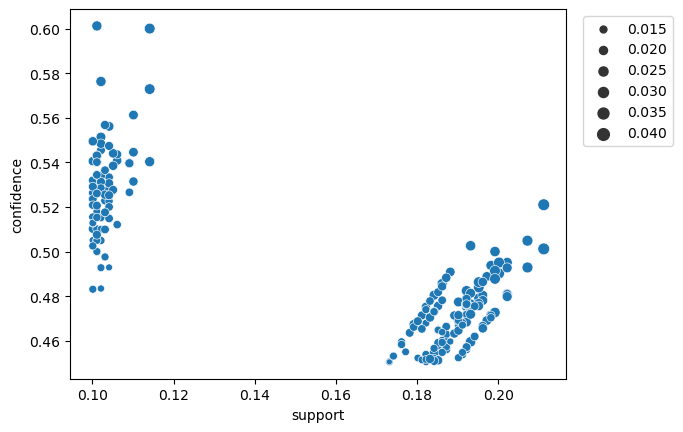

In [14]:
sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [15]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]


C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1571138333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1571138333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1571138333.py:4: SettingWithCopyWarning: 
A value is trying to be set on

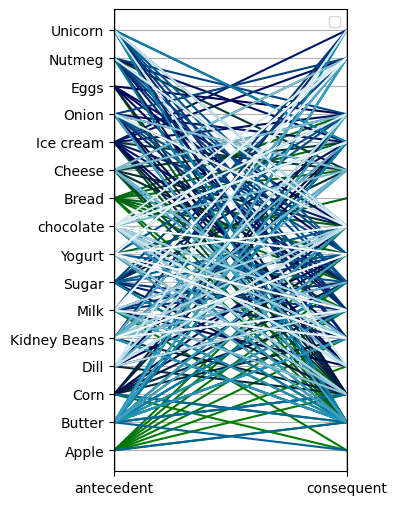

In [16]:
from pandas.plotting import parallel_coordinates
coords = rules_to_coordinates(filtered_rules)
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\HP\AppData\Local\Temp\ipykernel_8432\1019086969.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline

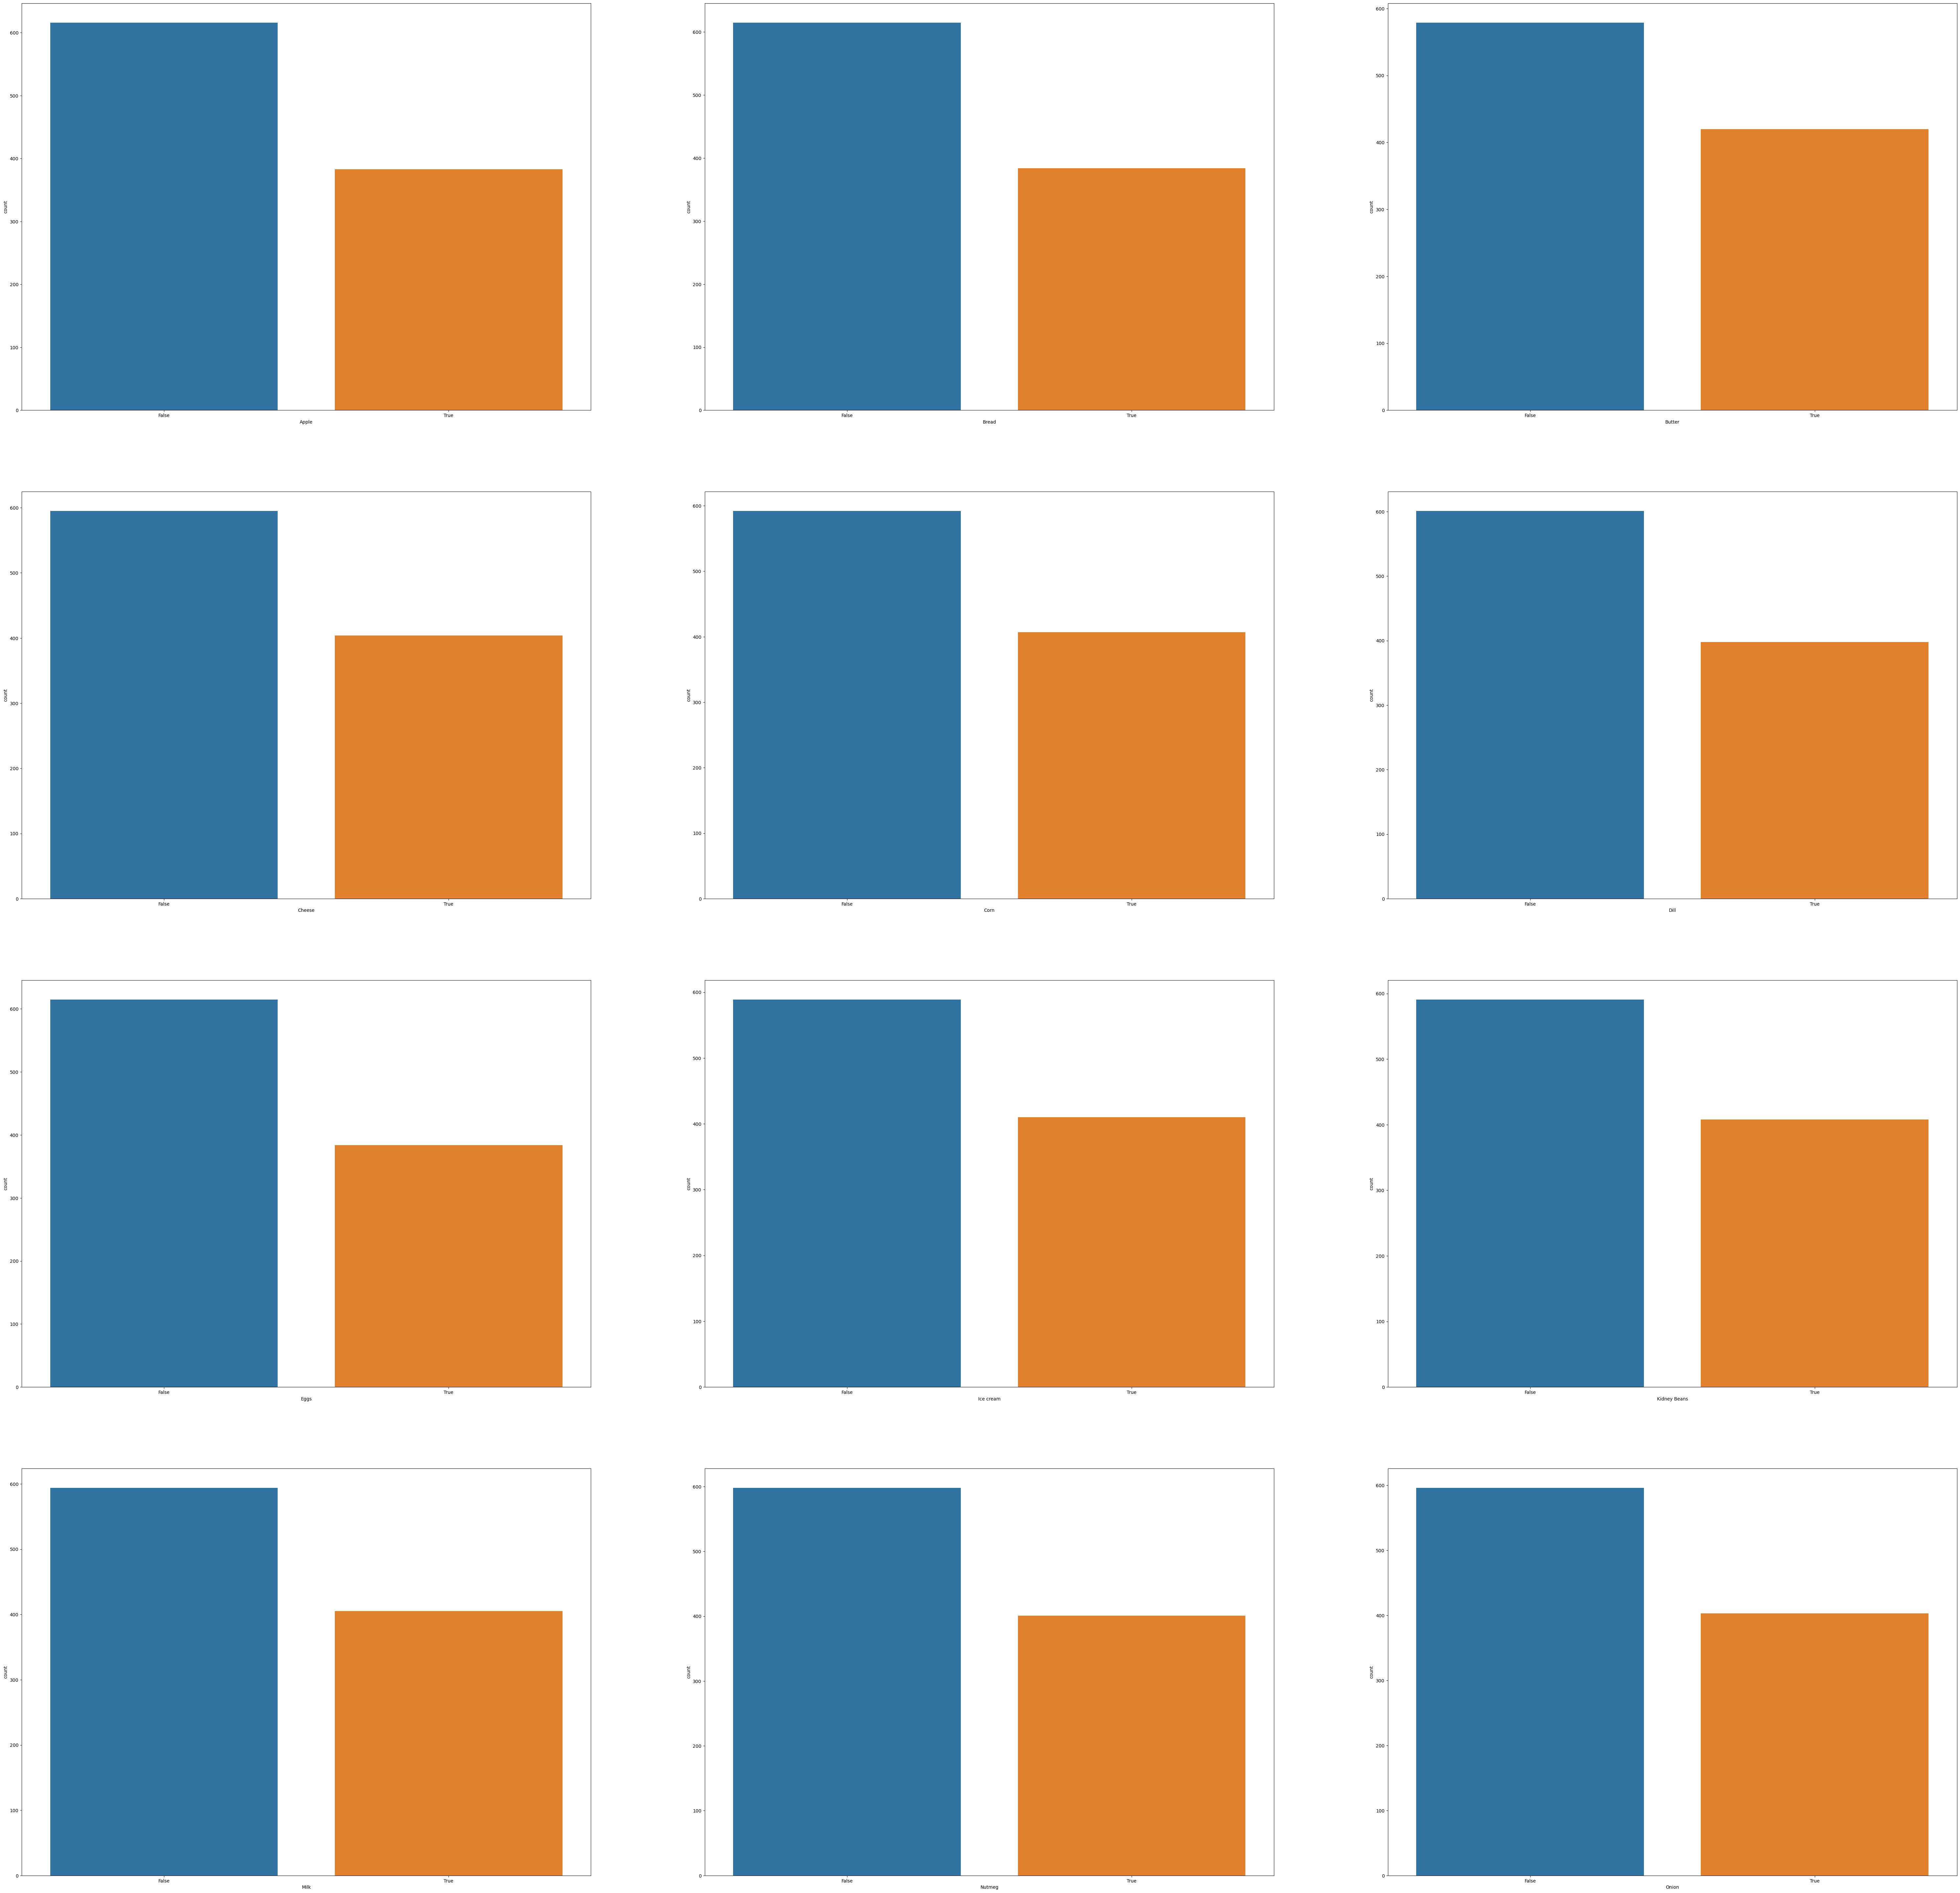

In [17]:
fig,ax=plt.subplots(4,3) 
count=0 
fig.set_figheight(74) 
fig.set_figwidth(76) 
for rows in range(4): 
    for cols in range(3): 
        sns.countplot(data=df,x=df.columns[count],ax=ax[rows][cols]) 
        count+=1 
        fig.show()

In [18]:
import joblib

In [19]:
joblib.dump(rules,'association_rule.pkl')

['association_rule.pkl']

In [22]:
import pandas as pd
import joblib

# Load association rules
Rules = joblib.load('association_rule.pkl')

def recommend_items(rules, input_items):
    recommended_items = set()
    
    for input_item in input_items:
        # Filter rules for the given input item in antecedents
        filtered_rules = rules[rules['antecedents'].apply(lambda x: input_item in x)]
        
        if not filtered_rules.empty:
            # Sort rules by lift, confidence, and support in descending order
            filtered_rules = filtered_rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False)
            
            # Extract recommended items from consequents column
            recommended_items.update(filtered_rules['consequents'].iloc[0])
    
    return recommended_items

def load_association_rules():
    return Rules

def main():
    # Load association rules
    rules = load_association_rules()
    
    # Example user input
    user_input = input("Enter the items you are interested in : ")
    input_items = [item.strip() for item in user_input.split(',')]
    
    # Get recommended items based on user input
    recommended_items = recommend_items(rules, input_items)

    # Display recommended items
    print("Recommended items for", ', '.join(input_items), ":", recommended_items)

if __name__ == "__main__":
    main()

Recommended items for Butter : {'Ice cream'}
